In [1]:
from utils import set_env

set_env("OPENAI_API_KEY")

In [7]:
from IPython.display import Image, display
from kasflow.graphs.recorder import RecorderGraph, RecorderState

graph = RecorderGraph()
compiled = graph.compiled

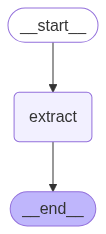

In [8]:
display(Image(graph.draw()))

In [9]:
# no expenses detected
in_state = RecorderState(message="Jalan-jalan ke kintamani")
out_state = compiled.invoke(in_state)
out_state

{'expenses': [], 'message': 'Jalan-jalan ke kintamani'}

In [10]:
# expenses detected
in_state = RecorderState(message="Servis mobil 1.5jt dan Makan siang 35rb")
out_state = compiled.invoke(in_state)
out_state

{'expenses': [Expense(amount=Decimal('1500000'), category='transportation', description='Servis mobil'),
  Expense(amount=Decimal('35000'), category='food', description='Makan siang')],
 'message': 'Servis mobil 1.5jt dan Makan siang 35rb'}